# An animation demo

Matplolib gives us two ways to make animations:
- [FuncAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation) which makes an animation by repeatedly calling a function func, and
- [ArtistAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib.animation.ArtistAnimation) which is an animation using a fixed set of Artist objects.

In this notebook, we look at `FuncAnimation` as an example.

**Nota Bene** these examples need `%matplolib notebook` or `%matplotlib nbagg` enabled _instead of_ `%matplotlib inline` in order to render in the notebook.

In [1]:
# set the matplolib backend to use
%matplotlib notebook
#%matplotlib nbagg
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math

## Example from the Documentation

Here is a [link to the documentation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation) for quick reference.

### Rain simulation

Modified from source: [Rain simulation](https://matplotlib.org/gallery/animation/rain.html#sphx-glr-gallery-animation-rain-py)

Author: Nicolas P. Rougier

<IPython.core.display.Javascript object>


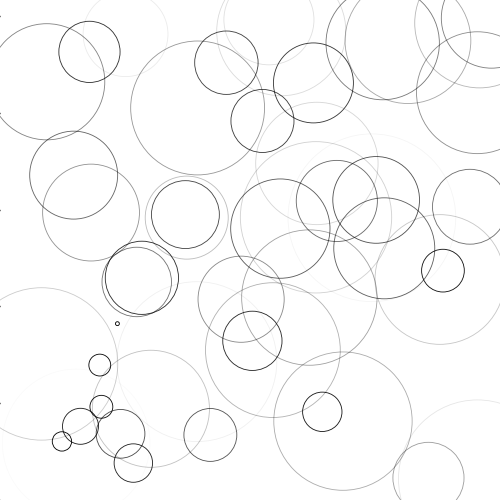

In [2]:
# Fixing random state for reproducibility
np.random.seed(42)

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')

def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

## Deconstructing the code

What are the moving parts in the example above?

First it should be noted from the [docs](https://matplotlib.org/api/animation_api.html) that:
>[...] it is critical to keep a reference to the instance object. The animation is advanced by a timer (typically from the host GUI framework) which the Animation object holds the only reference to. If you do not hold a reference to the Animation object, it (and hence the timers), will be garbage collected which will stop the animation.

This is achieved in the _rain simulation_ example by saving the `fig` object which is passed to the `FuncAnimation()` function.

In this example, the `FuncAnimation()` function takes three arguments:

`animation = FuncAnimation(fig, update, interval=10)`

1. `fig` which is the matplotlib figure object
2. an `update` function that will be repeatedly called
3. a keyword argument `interval` specifiying the delay between frames in milliseconds

## A simple example from scratch

Use the learnings from above to build a simple model.


First we build a matplotlib plot using a function to draw points on the perimeter of a circle:

In [3]:
def perimeter(r,n=36):
    """for a given radius r, calculate the coordinates of n points on the perimeter of a circle"""
    points = []
    for point in range(0,n):
        x = math.cos(2 * math.pi / n * point) * r
        y = math.sin(2 * math.pi / n * point) * r
        points.append((x,y))
    
    return np.array(points)

<IPython.core.display.Javascript object>


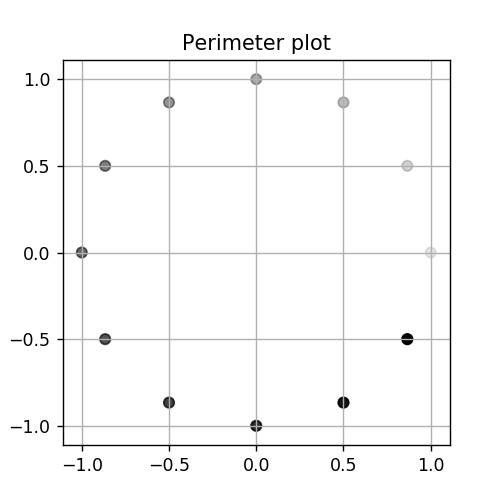

In [4]:
r, n = 1, 12
x = perimeter(r,n)[:,0]
y = perimeter(r,n)[:,1]

fig, ax = plt.subplots(figsize=(4,4), ncols=1)

alphas = np.linspace(0.1, 1, n)
rgba_colors = np.zeros((n,4))
rgba_colors[:, 3] = alphas

ax.scatter(x,y, color=rgba_colors)
ax.set_xticks(np.array(range(-10,11,5)) / 10)
ax.set_yticks(np.array(range(-10,11,5)) / 10)
ax.grid()
ax.set_title(f'Perimeter plot')

plt.show()

Next we will need a function to call at regular interval:

In [5]:
def rotate(alphas):
    """rotate the alpha linspace"""
    last = alphas[-1]
    alphas = np.delete(alphas, -1)
    alphas = np.insert(alphas, 0, last)
    
    return alphas

And now we will need to call the `rotate()` function with `FuncAnimation()` in order to update the plot, so some more changes are required:

<IPython.core.display.Javascript object>


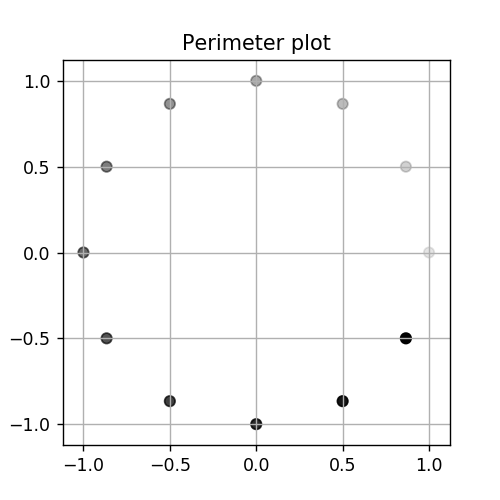

In [25]:
# Fixing circle radius and n points
r, n = 1, 12
# Fix plot ticks
ticks = np.array(range(-10,11,5)) / 10

# Create new Figure and an Axes which fills it.
fig, ax = plt.subplots(figsize=(4,4), ncols=1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_title(f'Perimeter plot')
ax.grid()

# Create x, y points
x = perimeter(r, n)[:,0]
y = perimeter(r, n)[:,1]

# Initialize alphas and rgba colors
alphas = np.linspace(0.1, 1, n)
rgba_colors = np.zeros((n,4))
rgba_colors[:, 3] = alphas

# Construct the scatter which we will update during animation
scat = ax.scatter(x, y, c=rgba_colors)

# define the function that will be called by `FuncAnimation()`
def rotate(frame_number):
    """rotate the alpha linspace"""
    scat.set_color(c=rgba_colors)

# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, rotate, interval=500, blit=True, repeat=True)
plt.show()

## A subsurface example

Build a subsurface example - or use Evan's code for example?

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2019</p>
</div>